In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Redes Neurais: Séries Temporais

Autor: Arthur Schneider Figueira

## Lendo as bibliotecas

In [2]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2023-10-17 21:27:51.013159: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-17 21:27:51.014650: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 21:27:51.036362: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 21:27:51.036376: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 21:27:51.036404: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [3]:
train = pd.read_csv('acoes_train.csv',index_col='index')
train.tail()

,Date,Open,High,Low,Close,Volume,Close_1lag,Close_2lag,Close_3lag,Close_4lag,Close_5lag
index,,,,,,,,,,,
1450,1/4/2021 16:00:00,222.53,223.00,214.81,217.69,37130139,222.42,221.68,224.15,224.96,222.75
1451,1/5/2021 16:00:00,217.26,218.52,215.70,217.90,23822953,217.69,222.42,221.68,224.15,224.96
1452,1/6/2021 16:00:00,212.17,216.49,211.94,212.25,35930653,217.90,217.69,222.42,221.68,224.15
1453,1/7/2021 16:00:00,214.04,219.34,213.71,218.29,27694480,212.25,217.90,217.69,222.42,221.68
1454,1/8/2021 16:00:00,218.68,220.58,217.03,219.62,22956206,218.29,212.25,217.90,217.69,222.42


In [4]:
train.index = pd.to_datetime(train.index)

In [5]:
test = pd.read_csv('acoes_test.csv',index_col='index')
test.index = pd.to_datetime(test.index)
test.tail()

,Date,Open,High,Low,Close,Volume,Close_1lag,Close_2lag,Close_3lag,Close_4lag,Close_5lag
index,,,,,,,,,,,
1970-01-01 00:00:00.000001506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853,235.46,237.58,235.99,230.35,230.72
1970-01-01 00:00:00.000001507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853,232.34,235.46,237.58,235.99,230.35
1970-01-01 00:00:00.000001508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455,236.48,232.34,235.46,237.58,235.99
1970-01-01 00:00:00.000001509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012,235.24,236.48,232.34,235.46,237.58
1970-01-01 00:00:00.000001510,3/31/2021 16:00:00,232.91,239.10,232.39,235.77,43623471,231.85,235.24,236.48,232.34,235.46


In [6]:
time_series_full = pd.concat([train,test])
time_series_full

,Date,Open,High,Low,Close,Volume,Close_1lag,Close_2lag,Close_3lag,Close_4lag,Close_5lag
index,,,,,,,,,,,
1970-01-01 00:00:00.000000005,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861,41.42,41.53,41.55,40.29,40.72
1970-01-01 00:00:00.000000006,4/10/2015 16:00:00,41.63,41.95,41.41,41.72,28022002,41.48,41.42,41.53,41.55,40.29
1970-01-01 00:00:00.000000007,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692,41.72,41.48,41.42,41.53,41.55
1970-01-01 00:00:00.000000008,4/14/2015 16:00:00,41.80,42.03,41.39,41.65,24244382,41.76,41.72,41.48,41.42,41.53
1970-01-01 00:00:00.000000009,4/15/2015 16:00:00,41.76,42.46,41.68,42.26,27343581,41.65,41.76,41.72,41.48,41.42
...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000001506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853,235.46,237.58,235.99,230.35,230.72
1970-01-01 00:00:00.000001507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853,232.34,235.46,237.58,235.99,230.35
1970-01-01 00:00:00.000001508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455,236.48,232.34,235.46,237.58,235.99


# Criando Defasagens (lags)

São valores passados da série temporal em relação ao valor atual. Para a base da temperatura, ela pode ser explicada com os dados umidade (humidity), velocidade do vento (wind speed) e pressão atmosférica média (mean pressure).

Entretanto, em muitos estudos de série temporal, não temos variáveis explicativas além da própria série alvo (histórico da variável resposta). Nesse cenário, usamos o próprio histórico da série como variável explicativa. Para isso, usamos observações anteriores para explicar o comportamento atual da série.

In [12]:
# time_series_full['value_1lag'] = [0]+list(time_series_full['value'].values)[:-1]
# time_series_full['value_2lag'] = [0,0]+list(time_series_full['value'].values)[:-2]
# time_series_full['Close_3lag'] = [0,0,0]+list(time_series_full['value'].values)[:-3]
# time_series_full['value_4lag'] = [0,0,0,0]+list(time_series_full['value'].values)[:-4]
# time_series_full['value_5lag'] = [0,0,0,0,0]+list(time_series_full['value'].values)[:-5]

In [7]:
# time_series_full.head(7)

,Date,Open,High,Low,Close,Volume,Close_1lag,Close_2lag,Close_3lag,Close_4lag,Close_5lag
index,,,,,,,,,,,
1970-01-01 00:00:00.000000005,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861,41.42,41.53,41.55,40.29,40.72
1970-01-01 00:00:00.000000006,4/10/2015 16:00:00,41.63,41.95,41.41,41.72,28022002,41.48,41.42,41.53,41.55,40.29
1970-01-01 00:00:00.000000007,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692,41.72,41.48,41.42,41.53,41.55
1970-01-01 00:00:00.000000008,4/14/2015 16:00:00,41.80,42.03,41.39,41.65,24244382,41.76,41.72,41.48,41.42,41.53
1970-01-01 00:00:00.000000009,4/15/2015 16:00:00,41.76,42.46,41.68,42.26,27343581,41.65,41.76,41.72,41.48,41.42
1970-01-01 00:00:00.000000010,4/16/2015 16:00:00,41.95,42.34,41.82,42.16,22509652,42.26,41.65,41.76,41.72,41.48
1970-01-01 00:00:00.000000011,4/17/2015 16:00:00,41.67,41.74,41.16,41.62,42387608,42.16,42.26,41.65,41.76,41.72


**Contextualizando**
No dia 01/01/2013 (primeira linha), a temperatura era igual a 10.

Com uma defasagem, vamos usar a temperatura do dia 01/01/2013 para explicar a temperatura do próximo dia: 02/01/2013. Portanto, a coluna *meantemp_1lag* consta com o valor 10 (temperatura do dia 01/01/2013) no dia 02/01/2013. Afinal, a ideia consiste em usar a temperatura do dia anterior para explicar a temperatura da data atual (considerando a data atual sendo 02/01/2013).

É importante ressaltar que: **a quantidade de defasagem corresponde a quantidade de linhas da fonte de dados que vamos desconsiderar**. Note que na coluna meantemp_1lag, o primeiro valor é 0, pois não temos dados anteriores a 01/01/2013. Já na coluna *meantemp_5lag*, os 5 primeiros valores são 0, visto que não temos os dados dos primeiros 5 dias.

Logo, será necessário remover as 5 primeiras linhas da tabela, se optarmos por utilizar 5 defasagens como variáveis explicativas.

In [14]:
# print(len(time_series_full))
# time_series_full = time_series_full.loc[(time_series_full.value_5lag > 0)]
# print(len(time_series_full))

1576
1571


In [15]:
# len(train.index)

1462

In [16]:
# train = time_series_full.loc[(time_series_full.index.isin(train.index))]
# train.tail()

,meantemp,humidity,wind_speed,meanpressure,meantemp_1lag,meantemp_2lag,meantemp_3lag,meantemp_4lag,meantemp_5lag
date,,,,,,,,,
2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.217391,16.850000,17.142857,14.000000,17.318182
2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.238095,17.217391,16.850000,17.142857,14.000000
2016-12-31,15.052632,87.000000,7.325000,1016.100000,14.095238,15.238095,17.217391,16.850000,17.142857
2017-01-01,10.000000,100.000000,0.000000,1016.000000,15.052632,14.095238,15.238095,17.217391,16.850000
2017-01-01,15.913043,85.869565,2.743478,59.000000,10.000000,15.052632,14.095238,15.238095,17.217391


In [17]:
test = time_series_full.loc[(time_series_full.index.isin(test.index))]
test.tail()

,meantemp,humidity,wind_speed,meanpressure,meantemp_1lag,meantemp_2lag,meantemp_3lag,meantemp_4lag,meantemp_5lag
date,,,,,,,,,
2017-04-20,34.500,27.500000,5.562500,998.625000,33.500,34.00,32.555556,31.000000,31.222222
2017-04-21,34.250,39.375000,6.962500,999.875000,34.500,33.50,34.000000,32.555556,31.000000
2017-04-22,32.900,40.900000,8.890000,1001.600000,34.250,34.50,33.500000,34.000000,32.555556
2017-04-23,32.875,27.500000,9.962500,1002.125000,32.900,34.25,34.500000,33.500000,34.000000
2017-04-24,32.000,27.142857,12.157143,1004.142857,32.875,32.90,34.250000,34.500000,33.500000


# Modelagem de Séries Temporais

### Rede Neural LSTM

A arquitetura LSTM de rede neural funciona a partir das unidades. Cada unidade é como se fosse um neurônio que é conectado ao outro de maneira sequencial:

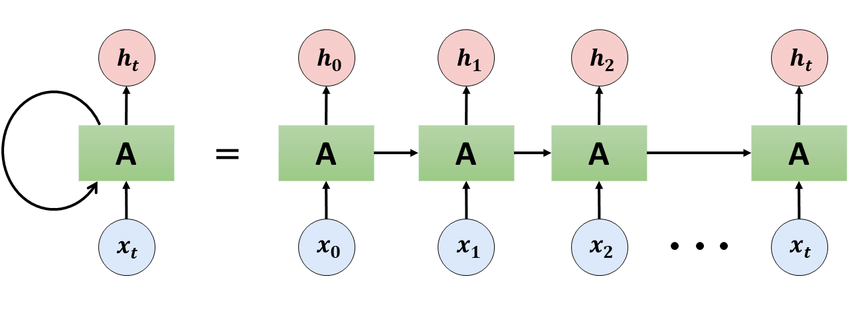

No exemplo acima, a gente compreende o motivo dessa rede ser Recorrente. Ou seja, o primeiro neurônio recebe uma entrada e gera uma saída. Essa saída é utilizada pelo neurônio seguinte, ao longo do tempo.

A arquitetura LSTM usa esse princípio combinando com particularidades extra:

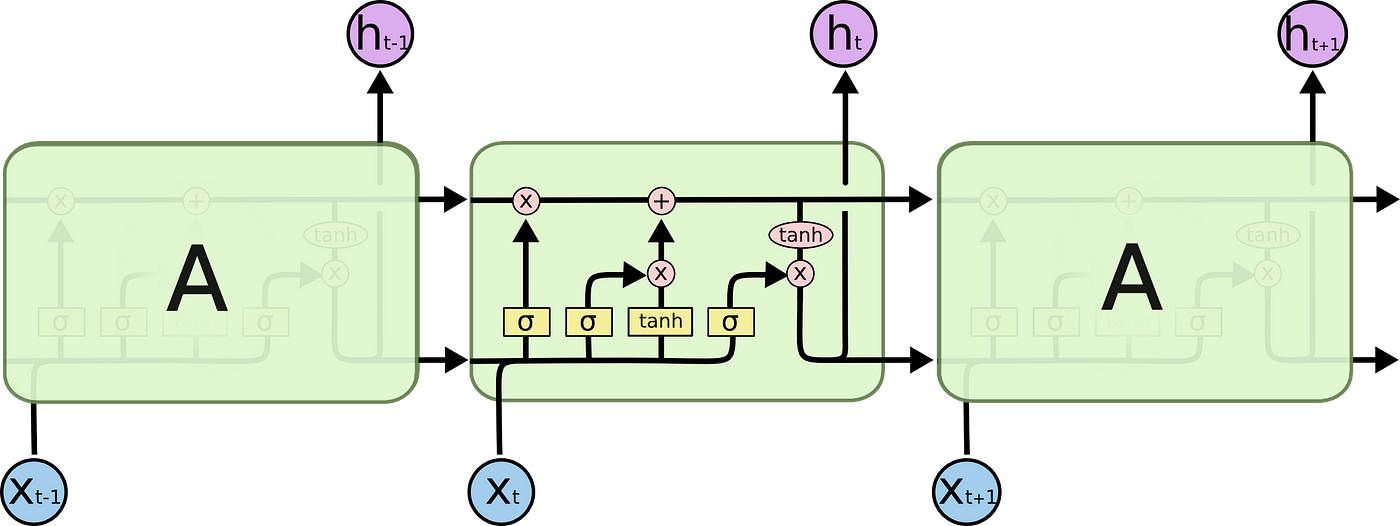

Na imagem acima, temos o seguinte exemplo:

O "X" do tempo anterior (t-1) é a entrada da unidade. Há a arquitetura da rede neural LSTM que analisa a entrada e gera 3 saídas. h(t-1) e mais duas saídas. A saída h (t-1) é uma parte do conhecimento da rede neural que será descartada. Já as outras duas saídas representadas pelas setas, seguem conectadas a próxima unidade da rede neural que vai receber a variável X (t). Portanto, é importante notar que além de receber a variável X no momento posterior, esse neurônio/unidade recebe também a experiência obtida no momento anterior (t-1).

Se observarmos uma unidade isoladamente, fica claro o que é recebido, "esquecido" e passado para a próxima unidade:

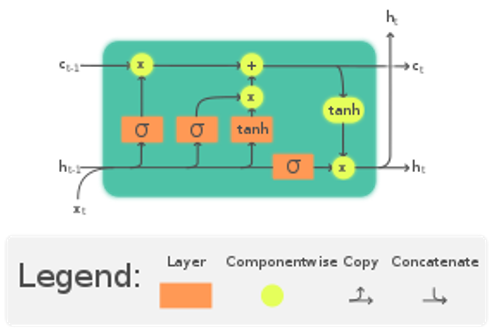

* Ct-1: é o output gerado pela unidade anterior e é aproveitado pela unidade atual;
* Ht-1: é o output gerado pela unidade anterior que é vinculado ao X atual e analisado pela unidade atual;
* H t: é o conhecimento gerado pela unidade. Uma parte dele é esquecido e outra parte é levada adiante;
* C t: é outro output gerado pela unidade LSTM que será utilizado na próxima unidade;
* A parte laranja são funções de ativação. Tangentes e sigmoids.
* A parte amarela envolve os vetores com valores e uma função de ativação tangente.

index
1970-01-01 00:00:00.000000005     41.48
1970-01-01 00:00:00.000000006     41.72
1970-01-01 00:00:00.000000007     41.76
1970-01-01 00:00:00.000000008     41.65
1970-01-01 00:00:00.000000009     42.26
                                  ...  
1970-01-01 00:00:00.000001450    217.69
1970-01-01 00:00:00.000001451    217.90
1970-01-01 00:00:00.000001452    212.25
1970-01-01 00:00:00.000001453    218.29
1970-01-01 00:00:00.000001454    219.62
Name: Close, Length: 1450, dtype: float64

In [17]:
# Passo 1: separando X e Y e normalizando os dados

X = train[['Close_1lag',	'Close_2lag',	'Close_3lag',	'Close_4lag',	'Close_5lag']]
y = train["Close"]

# Normalização dos dados
# Normalize os dados (opcional, mas pode melhorar o desempenho da rede)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Converta os dados para o formato 3D esperado pela LSTM (samples, timesteps, features)
# Nesse caso, como temos apenas uma variável explicativa (3 features), definimos timesteps = 1.
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

In [18]:
len(X),len(y)

(1450, 1450)

In [19]:
X_lstm.shape #1462 linhas na base, por 1 data, com 3 variáveis explicativas em cada data

(1450, 1, 5)

### LSTM: Modelo 1

In [20]:
# Passo 2: Crie o modelo LSTM usando TensorFlow

model1 = Sequential()
model1.add(LSTM(units=50, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model1.add(Dense(units=1))

# Passo 3: Compile o modelo

model1.compile(loss='mean_squared_error', optimizer='adam')

# Passo 4: Treine o modelo

history1 = model1.fit(X_lstm, y_scaled, epochs=200, batch_size=32)

Epoch 1/200


2023-10-17 21:34:31.564505: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-17 21:34:31.564867: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


46/46 [==============================] - 1s 724us/step - loss: 0.0924
Epoch 2/200
46/46 [==============================] - 0s 634us/step - loss: 0.0104
Epoch 3/200
46/46 [==============================] - 0s 580us/step - loss: 0.0013
Epoch 4/200
46/46 [==============================] - 0s 584us/step - loss: 3.7995e-04
Epoch 5/200
46/46 [==============================] - 0s 623us/step - loss: 2.6874e-04
Epoch 6/200
46/46 [==============================] - 0s 670us/step - loss: 2.5592e-04
Epoch 7/200
46/46 [==============================] - 0s 585us/step - loss: 2.5503e-04
Epoch 8/200
46/46 [==============================] - 0s 596us/step - loss: 2.4817e-04
Epoch 9/200
46/46 [==============================] - 0s 651us/step - loss: 2.4337e-04
Epoch 10/200
46/46 [==============================] - 0s 649us/step - loss: 2.4158e-04
Epoch 11/200
46/46 [==============================] - 0s 625us/step - loss: 2.3658e-04
Epoch 12/200
46/46 [==============================] - 0s 678us/step - loss: 

### LSTM: Modelo 2

In [21]:
# Passo 2: Crie o modelo LSTM usando TensorFlow

model2 = Sequential()
model2.add(LSTM(units=100, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model2.add(Dense(units=1))

# Passo 3: Compile o modelo

model2.compile(loss='mean_squared_error', optimizer='adam')

# Passo 4: Treine o modelo

history2 = model2.fit(X_lstm, y_scaled, epochs=200, batch_size=32)

Epoch 1/200
46/46 [==============================] - 1s 763us/step - loss: 0.0746
Epoch 2/200
46/46 [==============================] - 0s 714us/step - loss: 0.0039
Epoch 3/200
46/46 [==============================] - 0s 734us/step - loss: 5.4585e-04
Epoch 4/200
46/46 [==============================] - 0s 714us/step - loss: 2.6681e-04
Epoch 5/200
46/46 [==============================] - 0s 644us/step - loss: 2.4569e-04
Epoch 6/200
46/46 [==============================] - 0s 639us/step - loss: 2.4002e-04
Epoch 7/200
46/46 [==============================] - 0s 737us/step - loss: 2.3771e-04
Epoch 8/200
46/46 [==============================] - 0s 739us/step - loss: 2.3525e-04
Epoch 9/200
46/46 [==============================] - 0s 688us/step - loss: 2.3488e-04
Epoch 10/200
46/46 [==============================] - 0s 652us/step - loss: 2.3139e-04
Epoch 11/200
46/46 [==============================] - 0s 650us/step - loss: 2.3195e-04
Epoch 12/200
46/46 [==============================] - 0s 649

### LSTM: Modelo 3

In [22]:
# Passo 2: Crie o modelo LSTM usando TensorFlow

model3 = Sequential()
model3.add(LSTM(units=100, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model3.add(Dense(units=1))

# Passo 3: Compile o modelo

model3.compile(loss='mean_squared_error', optimizer='adam')

# Passo 4: Treine o modelo

history3 = model3.fit(X_lstm, y_scaled, epochs=200, batch_size=128)

Epoch 1/200


12/12 [==============================] - 0s 1ms/step - loss: 0.1470
Epoch 2/200
12/12 [==============================] - 0s 915us/step - loss: 0.0961
Epoch 3/200
12/12 [==============================] - 0s 911us/step - loss: 0.0527
Epoch 4/200
12/12 [==============================] - 0s 914us/step - loss: 0.0221
Epoch 5/200
12/12 [==============================] - 0s 986us/step - loss: 0.0072
Epoch 6/200
12/12 [==============================] - 0s 904us/step - loss: 0.0039
Epoch 7/200
12/12 [==============================] - 0s 865us/step - loss: 0.0031
Epoch 8/200
12/12 [==============================] - 0s 913us/step - loss: 0.0022
Epoch 9/200
12/12 [==============================] - 0s 917us/step - loss: 0.0015
Epoch 10/200
12/12 [==============================] - 0s 868us/step - loss: 0.0010
Epoch 11/200
12/12 [==============================] - 0s 1ms/step - loss: 7.4735e-04
Epoch 12/200
12/12 [==============================] - 0s 1ms/step - loss: 5.6043e-04
Epoch 13/200
12/12 [===

### Comparando a Loss

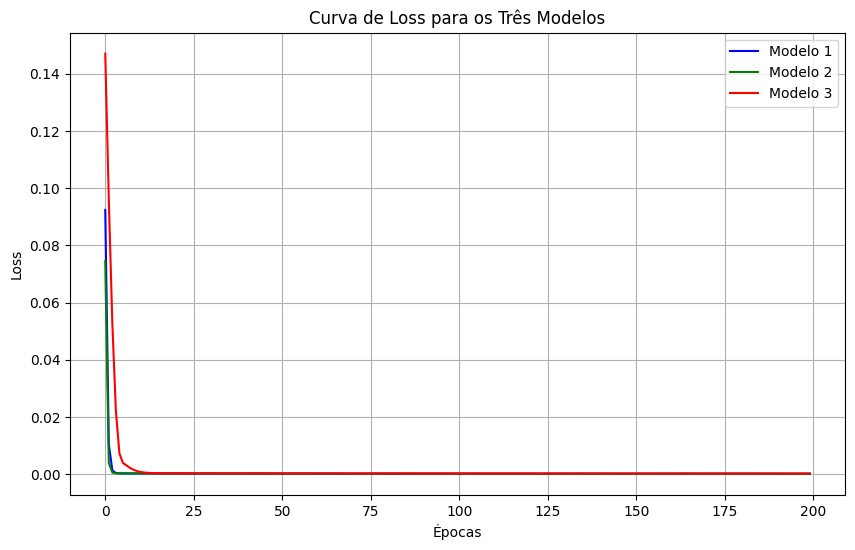

In [23]:
# Supondo que você tenha os objetos "history1", "history2" e "history3", que contêm informações sobre o treinamento dos três modelos.

# Plotando as curvas de loss
plt.figure(figsize=(10, 6))

plt.plot(history1.history['loss'], label='Modelo 1', color='blue')
plt.plot(history2.history['loss'], label='Modelo 2', color='green')
plt.plot(history3.history['loss'], label='Modelo 3', color='red')

plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Curva de Loss para os Três Modelos')
plt.legend()
plt.grid(True)
plt.show()

### Avaliando a base de teste

In [25]:
# Passo 1: Pré-processamento dos novos dados de teste

# Divida os dados em variáveis de entrada (X) e variável de saída (y), similar ao que você fez para os dados de treinamento.
X_test = test[['Close_1lag',	'Close_2lag',	'Close_3lag',	'Close_4lag',	'Close_5lag']]

# Normalize os dados usando o mesmo scaler que você usou para os dados de treinamento.
X_test_scaled = scaler_X.transform(X_test)

# Converta os dados para o formato 3D esperado pela LSTM
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Passo 2: Fazer previsões com o modelo LSTM

# Use o método predict para fazer as previsões
y_pred_scaled1 = model1.predict(X_test_lstm)
y_pred_scaled2 = model2.predict(X_test_lstm)
y_pred_scaled3 = model3.predict(X_test_lstm)

# Como o modelo retorna as previsões em escala, desfaça a normalização para obter as previsões reais
y_pred1 = scaler_y.inverse_transform(y_pred_scaled1)
y_pred2 = scaler_y.inverse_transform(y_pred_scaled2)
y_pred3 = scaler_y.inverse_transform(y_pred_scaled3)

2/2 [==============================] - 0s 1ms/step


No exemplo anterior, usando umidade, pressão atmosférica e velocidade do vento, o resultado foi:

* RMSE Modelo 1: 9.518648288930006
* RMSE Modelo 2: 9.382544234222491
* RMSE Modelo 3: 9.306333916727356
* RMSE do AutoARIMA: 10.649383525981344

In [26]:
# Calcule o RMSE para cada modelo
rmse_model1 = np.sqrt(np.mean((np.array(test['Close']) - y_pred1) ** 2))
rmse_model2 = np.sqrt(np.mean((np.array(test['Close']) - y_pred2) ** 2))
rmse_model3 = np.sqrt(np.mean((np.array(test['Close']) - y_pred3) ** 2))

print('RMSE Modelo 1:', rmse_model1)
print('RMSE Modelo 2:', rmse_model2)
print('RMSE Modelo 3:', rmse_model3)

RMSE Modelo 1: 11.583274298436418
RMSE Modelo 2: 11.38273860442279
RMSE Modelo 3: 11.85327565418289


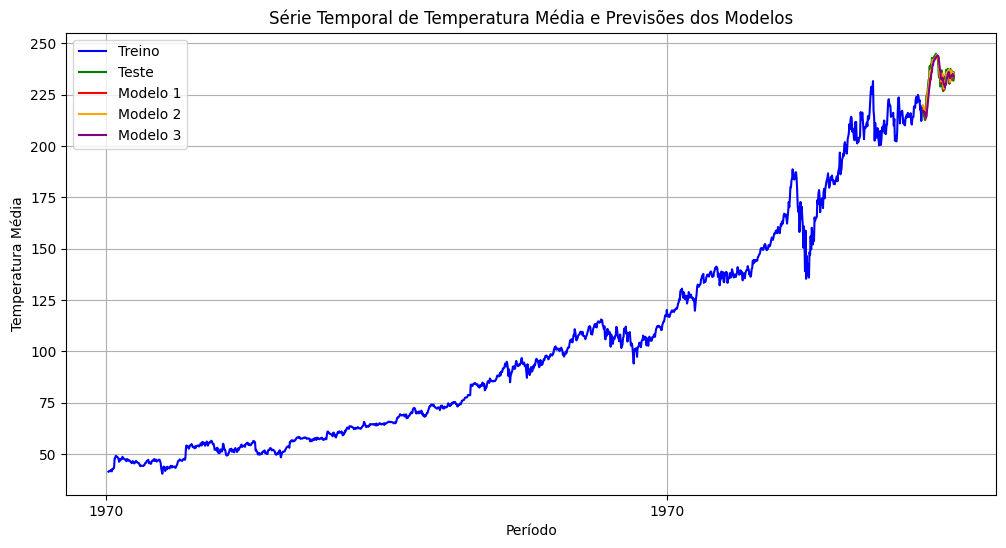

In [27]:
# Plotando a série temporal da coluna "value" da base de treino e teste
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Treino', color='blue')
plt.plot(test.index, test['Close'], label='Teste', color='green')

# Plotando as previsões dos modelos em cores diferentes
plt.plot(test.index, y_pred1, label='Modelo 1', color='red')
plt.plot(test.index, y_pred2, label='Modelo 2', color='orange')
plt.plot(test.index, y_pred3, label='Modelo 3', color='purple')

plt.xlabel('Período')
plt.ylabel('Temperatura Média')
plt.title('Série Temporal de Temperatura Média e Previsões dos Modelos')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [28]:
test['Modelo 1'] = y_pred1
test['Modelo 2'] = y_pred2
test['Modelo 3'] = y_pred3

test

,Date,Open,High,Low,Close,Volume,Close_1lag,Close_2lag,Close_3lag,Close_4lag,Close_5lag,Modelo 1,Modelo 2,Modelo 3
index,,,,,,,,,,,,,,
1970-01-01 00:00:00.000001455,1/11/2021 16:00:00,218.47,218.91,216.73,217.49,23047029,219.62,218.29,212.25,217.90,217.69,218.611542,219.748779,216.624084
1970-01-01 00:00:00.000001456,1/12/2021 16:00:00,216.50,217.10,213.32,214.93,23249336,217.49,219.62,218.29,212.25,217.90,218.779175,219.730911,217.268021
1970-01-01 00:00:00.000001457,1/13/2021 16:00:00,214.02,216.76,213.93,216.34,20087080,214.93,217.49,219.62,218.29,212.25,216.585129,217.281815,216.137711
1970-01-01 00:00:00.000001458,1/14/2021 16:00:00,215.91,217.46,212.74,213.02,29346737,216.34,214.93,217.49,219.62,218.29,216.142059,217.078568,216.581146
1970-01-01 00:00:00.000001459,1/15/2021 16:00:00,213.52,214.51,212.03,212.65,31746512,213.02,216.34,214.93,217.49,219.62,214.447159,215.253036,215.179367
1970-01-01 00:00:00.000001460,1/19/2021 16:00:00,213.75,216.98,212.63,216.44,30480859,212.65,213.02,216.34,214.93,217.49,213.478256,214.331940,214.258957
1970-01-01 00:00:00.000001461,1/20/2021 16:00:00,217.70,225.79,217.29,224.34,37777260,216.44,212.65,213.02,216.34,214.93,215.138275,216.220169,214.249527
1970-01-01 00:00:00.000001462,1/21/2021 16:00:00,224.70,226.30,222.42,224.97,30749553,224.34,216.44,212.65,213.02,216.34,221.046494,222.270187,217.176865
1970-01-01 00:00:00.000001463,1/22/2021 16:00:00,227.08,230.07,225.80,225.95,30172663,224.97,224.34,216.44,212.65,213.02,224.392563,225.212524,219.272903


### AutoSarima

In [29]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.8 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 21.2 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.2 MB/s eta 0:00:0000:01


In [30]:
import pmdarima as pm

In [31]:
# Crie o modelo AutoARIMA e encontre o melhor modelo ARIMA automaticamente
model4 = pm.auto_arima(np.array(train['Close']), exogenous=np.array(train[['Close_1lag',	'Close_2lag',	'Close_3lag',	'Close_4lag',	'Close_5lag']]), seasonal=True, m=7)  # O parâmetro "m" representa a frequência da sazonalidade (7 dias por semana)

# Faça as previsões usando o modelo treinado
y_pred4 = model4.predict(n_periods=len(np.array(test['Close'])), exogenous=np.array(test[['Close_1lag',	'Close_2lag',	'Close_3lag',	'Close_4lag',	'Close_5lag']]))

In [32]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1450
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -3171.399
Date:                Tue, 17 Oct 2023   AIC                           6356.798
Time:                        21:36:22   BIC                           6393.749
Sample:                             0   HQIC                          6370.587
                               - 1450                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5471      0.210      2.605      0.009       0.135       0.959
ar.L1         -1.9951      0.028    -71.414      0.000      -2.050      -1.940
ar.L2         -1.2787      0.040    -32.163      0.000      -1.357      -1.201
ar.L3         -0.1818      0.017    -10.908      0.000      -0.215      -0.149
ma.L1          1.7562      0.025     71.292      0.000       1.708       1.805
ma.L2          0.8583      0.023     38.027      0.000       0.814       0.903
sigma2         4.6606      0.072     65.142      0.000       4.520       4.801
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8558.80
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              17.49   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
# Calcule o RMSE para avaliar o desempenho do modelo
rmse = mean_squared_error(np.array(test['Close']), y_pred4, squared=False)
print(f"RMSE do AutoARIMA: {rmse}")

RMSE do AutoARIMA: 13.080253007313543


# Conclusão

No exemplo anterior, usando umidade, pressão atmosférica e velocidade do vento, o resultado foi:

* RMSE Modelo 1: 9.518648288930006
* RMSE Modelo 2: 9.382544234222491
* RMSE Modelo 3: 9.306333916727356
* RMSE do AutoARIMA: 10.649383525981344

Usando a própria série com defasagens para explicar seu comportamento, obtivemos:

* RMSE Modelo 1: 8.838807165368115
* RMSE Modelo 2: 8.962550532868478
* RMSE Modelo 3: 8.844388155644248
* RMSE do AutoARIMA: 9.084805494202321

Portanto, **nesse estudo de caso**, a defasagem contribuiu para que a predição fosse melhor. Isso não é uma regra.

Há a oportunidade de testar as variáveis exógenas e a própria série (com defasagens) para explicar seu comportamento. Vale ressaltar que se houver muita correlação, pode não haver ganhos significativos.